In [1]:
# !pip install diffusers==0.11.1
# !pip install accelerate
# !pip install tensorflow-macos
# !pip install tensorflow-metel
# !pip install transformers

In [ ]:
# !git lfs install
# !git clone https://huggingface.co/CompVis/stable-diffusion-v1-4

In [1]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import torch

# Metal Performance Shaders (MPS)
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
else:
    print ("MPS device not found.")

In [3]:
from diffusers import StableDiffusionPipeline
from diffusers.pipelines.stable_diffusion import safety_checker

def sc(self, clip_input, images) :
    return images, [False for i in images]

# edit StableDiffusionSafetyChecker class so that, when called, it just returns the images and an array of True values
safety_checker.StableDiffusionSafetyChecker.forward = sc

pipe = StableDiffusionPipeline.from_pretrained(
        "stable-diffusion-v1-4", 
        safety_checker = None,
        requires_safety_checker = False
    )  
pipe = pipe.to("mps")

/Users/dsaipawan/Documents/stable-diffusion/stable_diffusion_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


100%|██████████| 50/50 [40:51<00:00, 49.02s/it]  


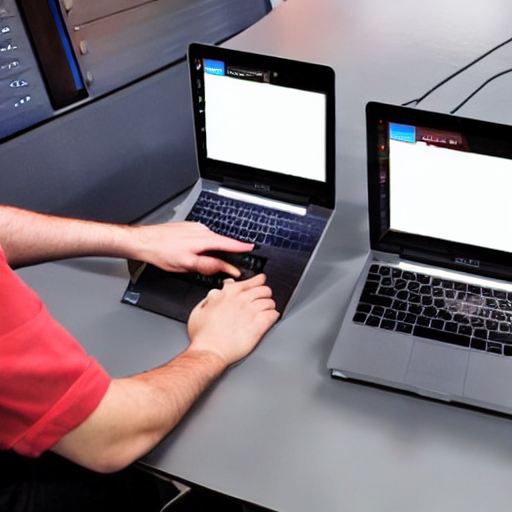

In [4]:
prompt = "Create am image of IT professional working on MAC book system."
image = pipe(prompt).images[0]  
image